## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no null values is present in dataset


In [10]:
df.duplicated().sum()

np.int64(0)

no duplicate values

In [11]:
cat_valeu=[cat for cat in df.columns if df[cat].dtype=='O']
for i in cat_valeu:
    print(i,df[i].unique(),'\n')

gender ['female' 'male'] 

race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch ['standard' 'free/reduced'] 

test_preparation_course ['none' 'completed'] 



In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype!='O']
catgorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [14]:
print('We have {} numerical feature:{}'.format(len(numeric_feature),numeric_feature))
print('We have {} categorical feature:{}'.format(len(catgorical_feature),catgorical_feature))

We have 3 numerical feature:['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df['Total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['Average']=df['Total_score']/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()
math_full =df[df['math_score']==100]['Average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_33 = df[df['reading_score']<33]['Average'].count()
writing_33 = df[df['writing_score']<33]['Average'].count()
math_33 =df[df['math_score']<33]['Average'].count()

print(f'number of student failed in maths less then 33: {math_33}')
print(f'number of student failed in writing less then 33: {writing_33}')
print(f'no of student failed in reading less then 33: {reading_33}')

number of student failed in maths less then 33: 19
number of student failed in writing less then 33: 12
no of student failed in reading less then 33: 11


# histogram & kde

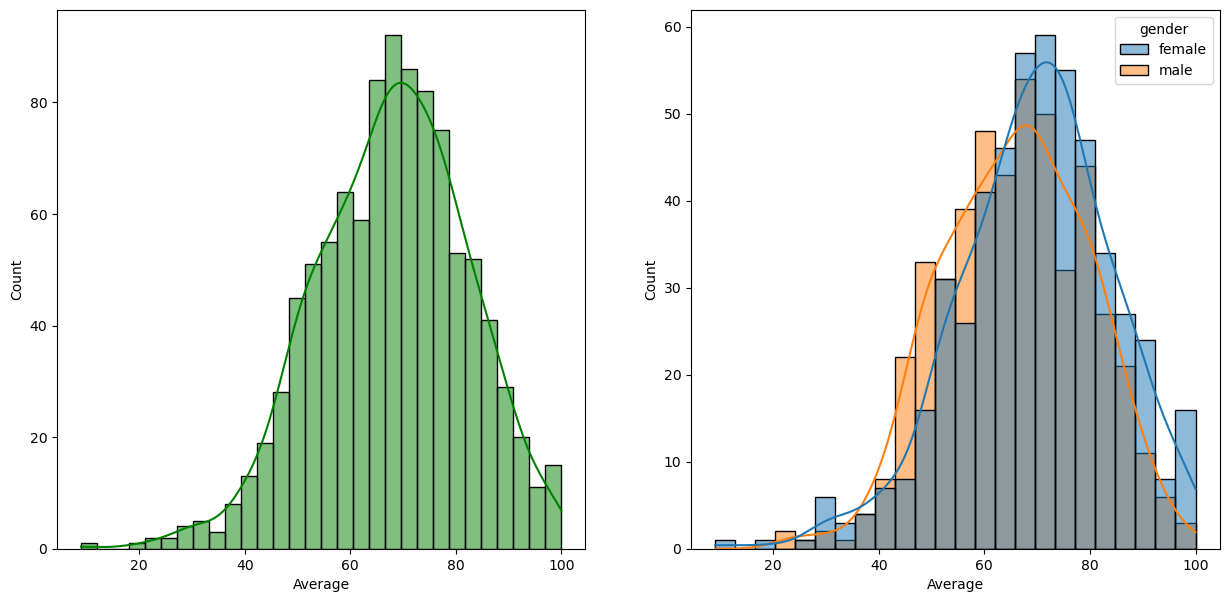

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df, x='Average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='Total_score', ylabel='Count'>

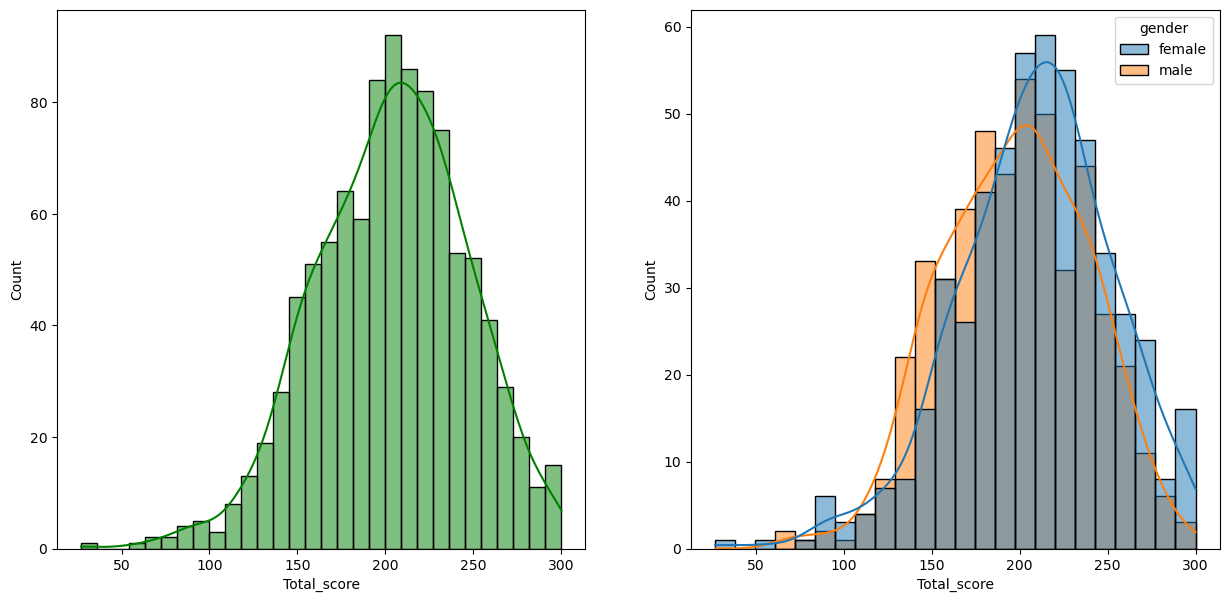

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')


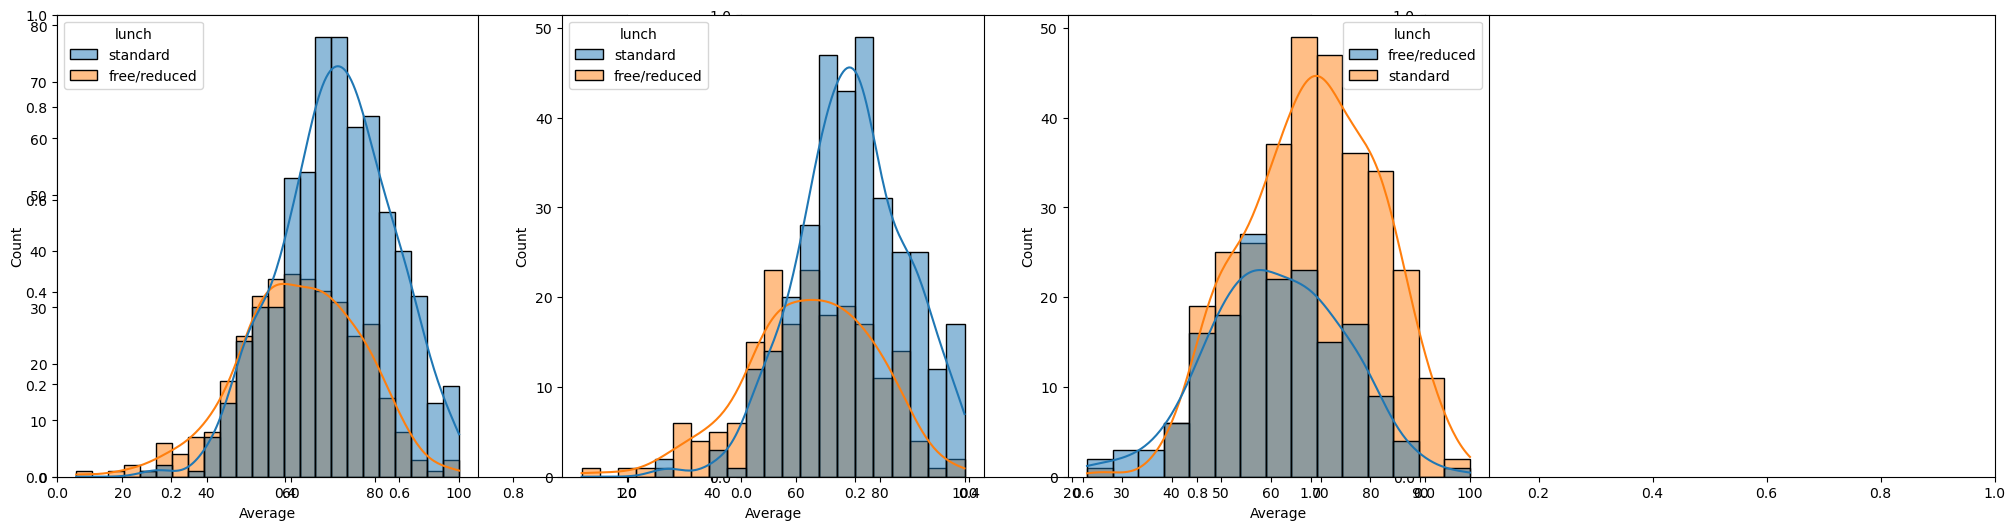

In [21]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

<Axes: xlabel='Average', ylabel='Count'>

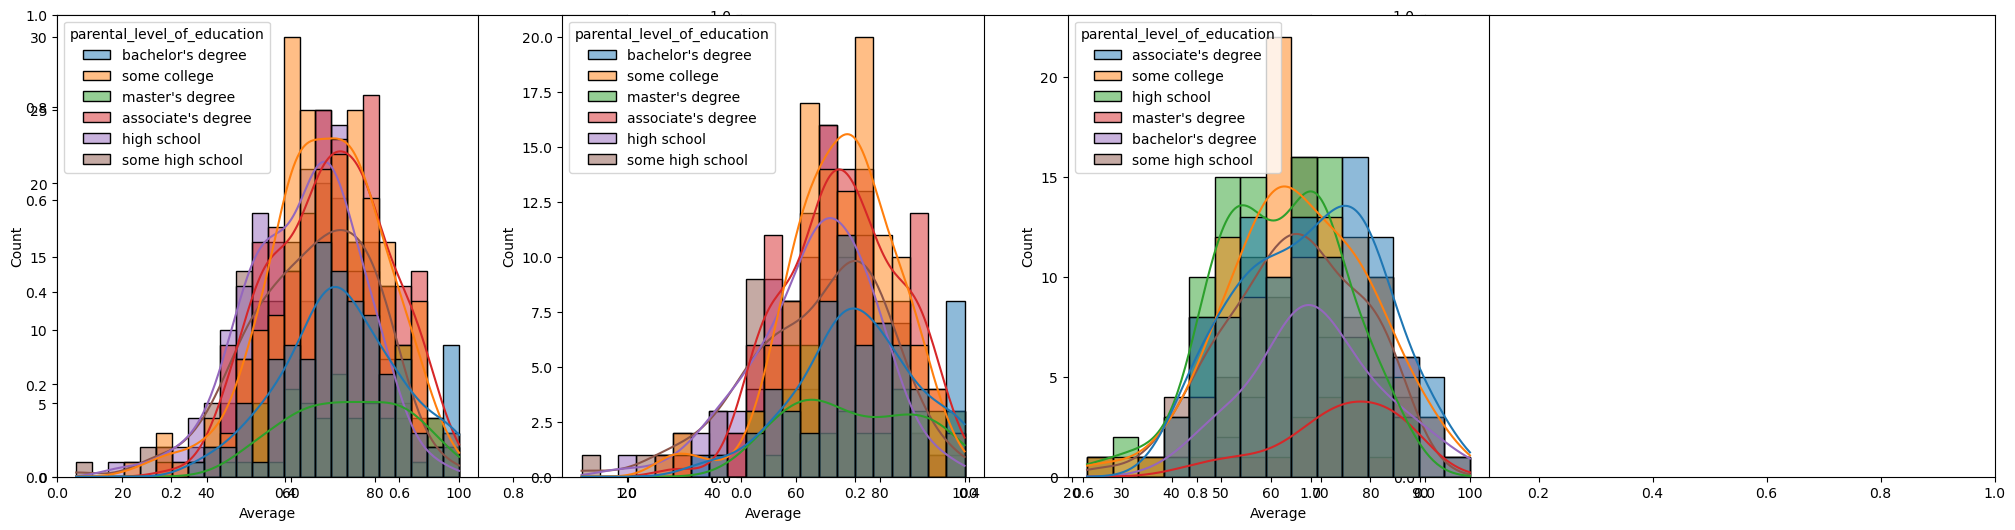

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='Average',kde =True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='Average',kde =True,hue='parental_level_of_education')

<Axes: xlabel='Average', ylabel='Count'>

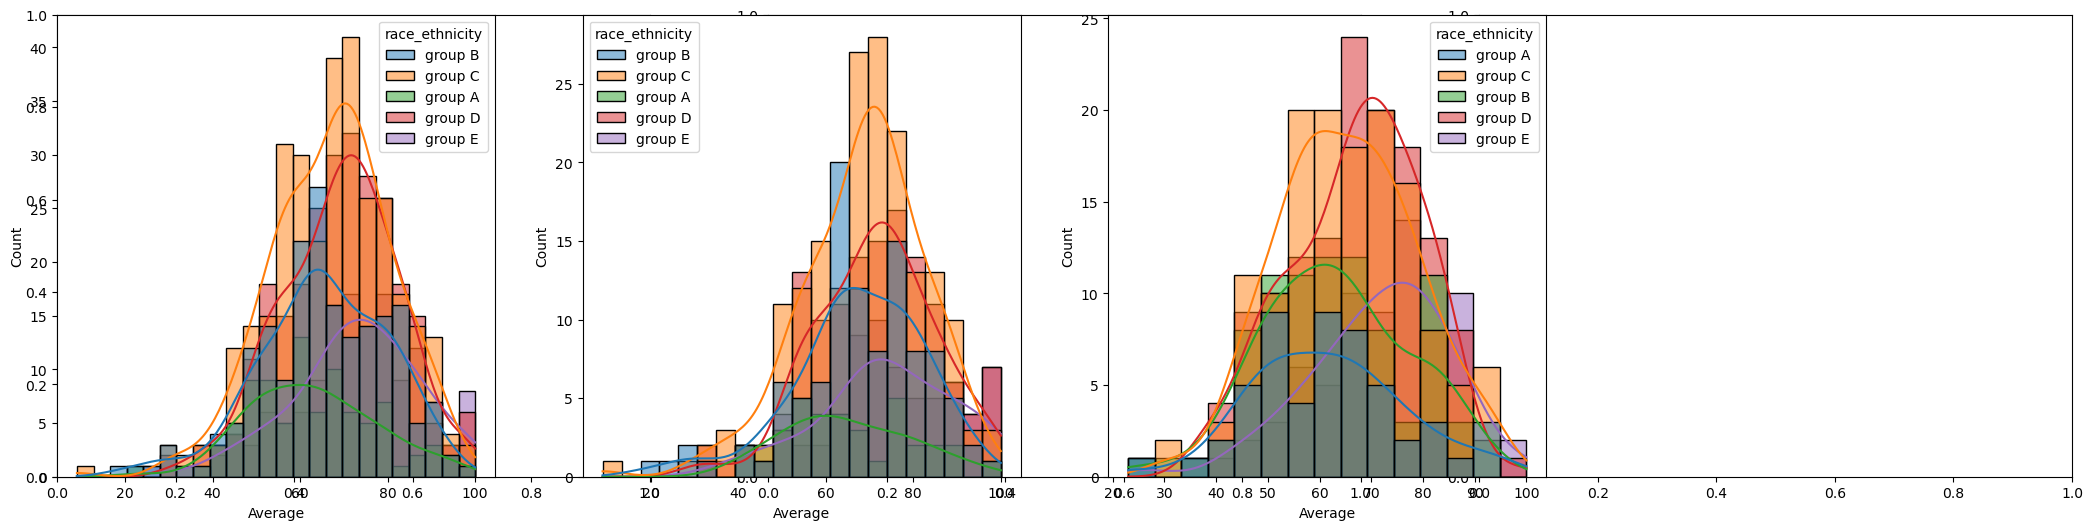

In [23]:
plt.subplots(1,3,figsize =(26,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')

#### 4.2 Maximumum score of students in all three subjects

<Axes: title={'center': 'writing_score'}, ylabel='writing_score'>

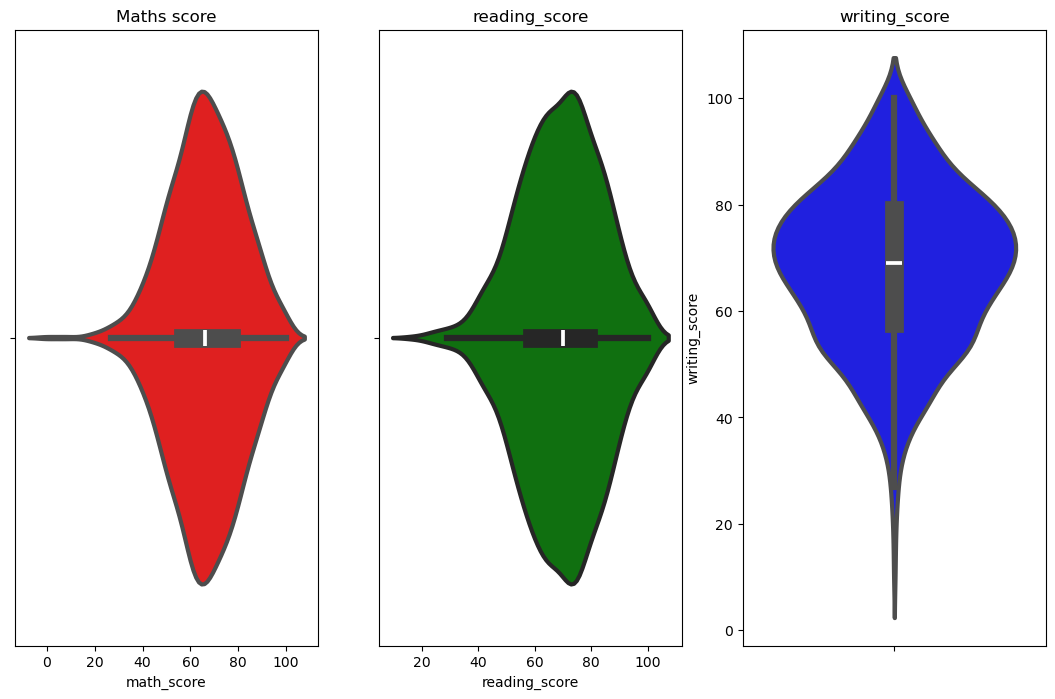

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Maths score')
sns.violinplot(x='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading_score')
sns.violinplot(x='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing_score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

In [25]:
for i in cat_valeu:
    print(i,df[i].unique(),'\n')

gender ['female' 'male'] 

race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch ['standard' 'free/reduced'] 

test_preparation_course ['none' 'completed'] 



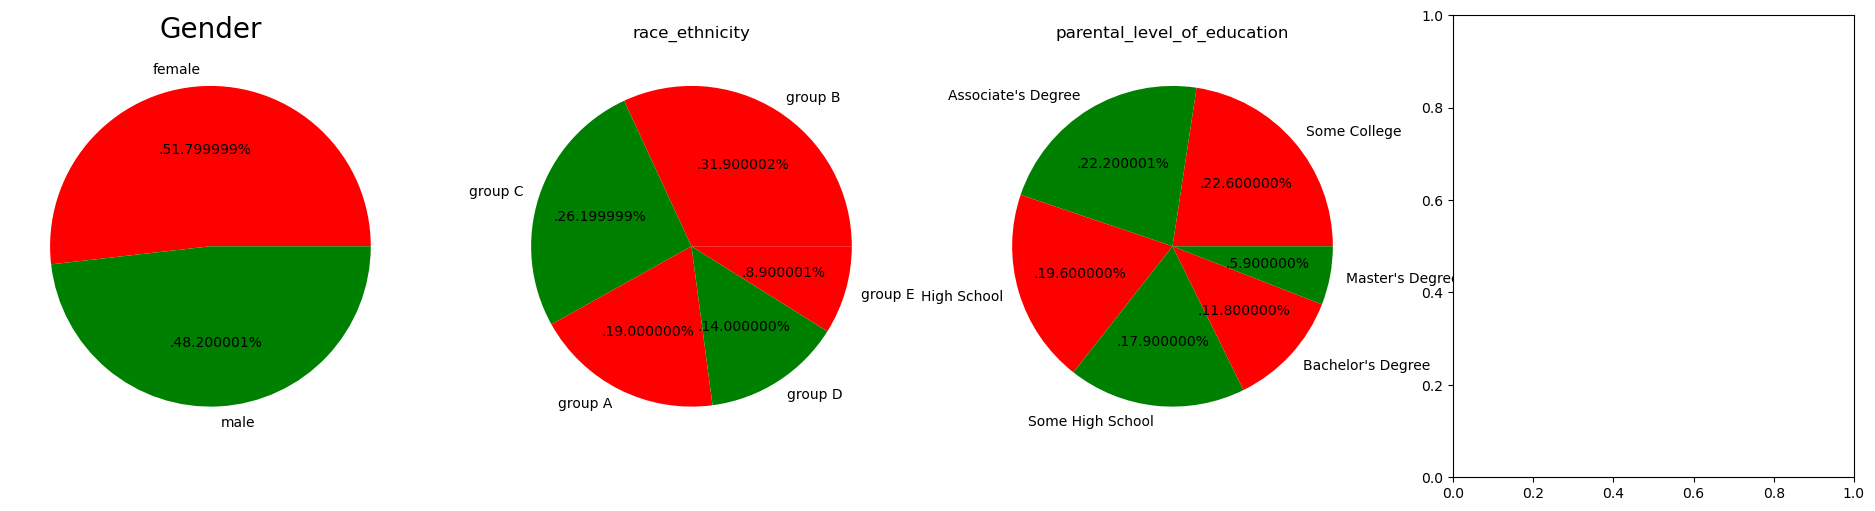

In [26]:
plt.rcParams['figure.figsize'] = (30,6)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'female' ,'male'
color =['red','green']



plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'group B' ,'group C' ,'group A' ,'group D', 'group E'
color =['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity')
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color =['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental_level_of_education')
plt.axis('off')
   
plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'none' , 'completed'
color = ['red','green']